# Project 4: Visualizing Monetary Policy

## Goals:

1. Create functions in separate py files. Save those files in a folder and import the files and their functions from the folder.
2. Download data from FRED. This includes aligning units so all data uses the same measures (i.e., billions or millions of dollars
3. Visualize the data using line graphs and stacked plots

In [1]:
#plots.py

# os module allows you to access commandline functions
# from python
import os
import pandas as pd
# math and data library
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40,20),
                    save_fig = False, pp = None):
    # gather variables from df
    plot_vars = list(df.keys())
    for x in plot_vars:
        for y in plot_vars:
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Years will be represented by color
                # Years will be the c value
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string
                    # only include first 4 characters, which is the year
                    # create an integer from those charcters
                    df["Year"] =[int(str(ind)[:4]) for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax=ax,
                                c = "Year", cmap = "viridis")
               
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis = "x", rotation=90)
                # get rid of tick lines
                ax.tick_params("both", length = 0, which="both")
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    # identify directory to save figure
                    directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                    plt.savefig(directory.replace(":", "-") + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

Next, we create a function to download data from FRED using pandas_datareader.

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(),freq = "A"):
    # check if new column is first column of data
    # if true, then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            # rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True) 
            i = None
        else:
            # if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df
    # if not, add to existing dataframe

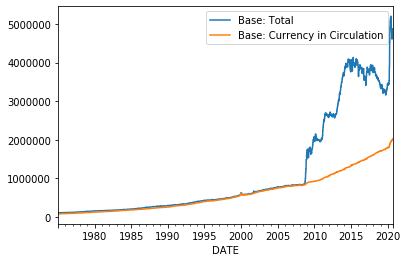

In [3]:
#fedProject.py
from datlib.plots import *
from datlib.FRED import *
# vars in millions of dollars
data_codes = {"Base: Total":"BOGMBASEW",
             "Base: Currency in Circulation":"MBCURRCIRW"}
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                  end = end,
                  freq = "W")
plt.rcParams.update({"font.size":10})
data.plot.line()

In [4]:
data

,Base: Total,Base: Currency in Circulation
DATE,,
1975-01-12,108920.0,78943.0
1975-01-19,107891.0,78245.0
1975-01-26,107988.0,77505.0
1975-02-02,106358.0,76749.0
1975-02-09,106061.0,76530.0
1975-02-16,105693.0,77119.0
1975-02-23,105663.0,77358.0
1975-03-02,104951.0,77031.0
1975-03-09,104932.0,77087.0


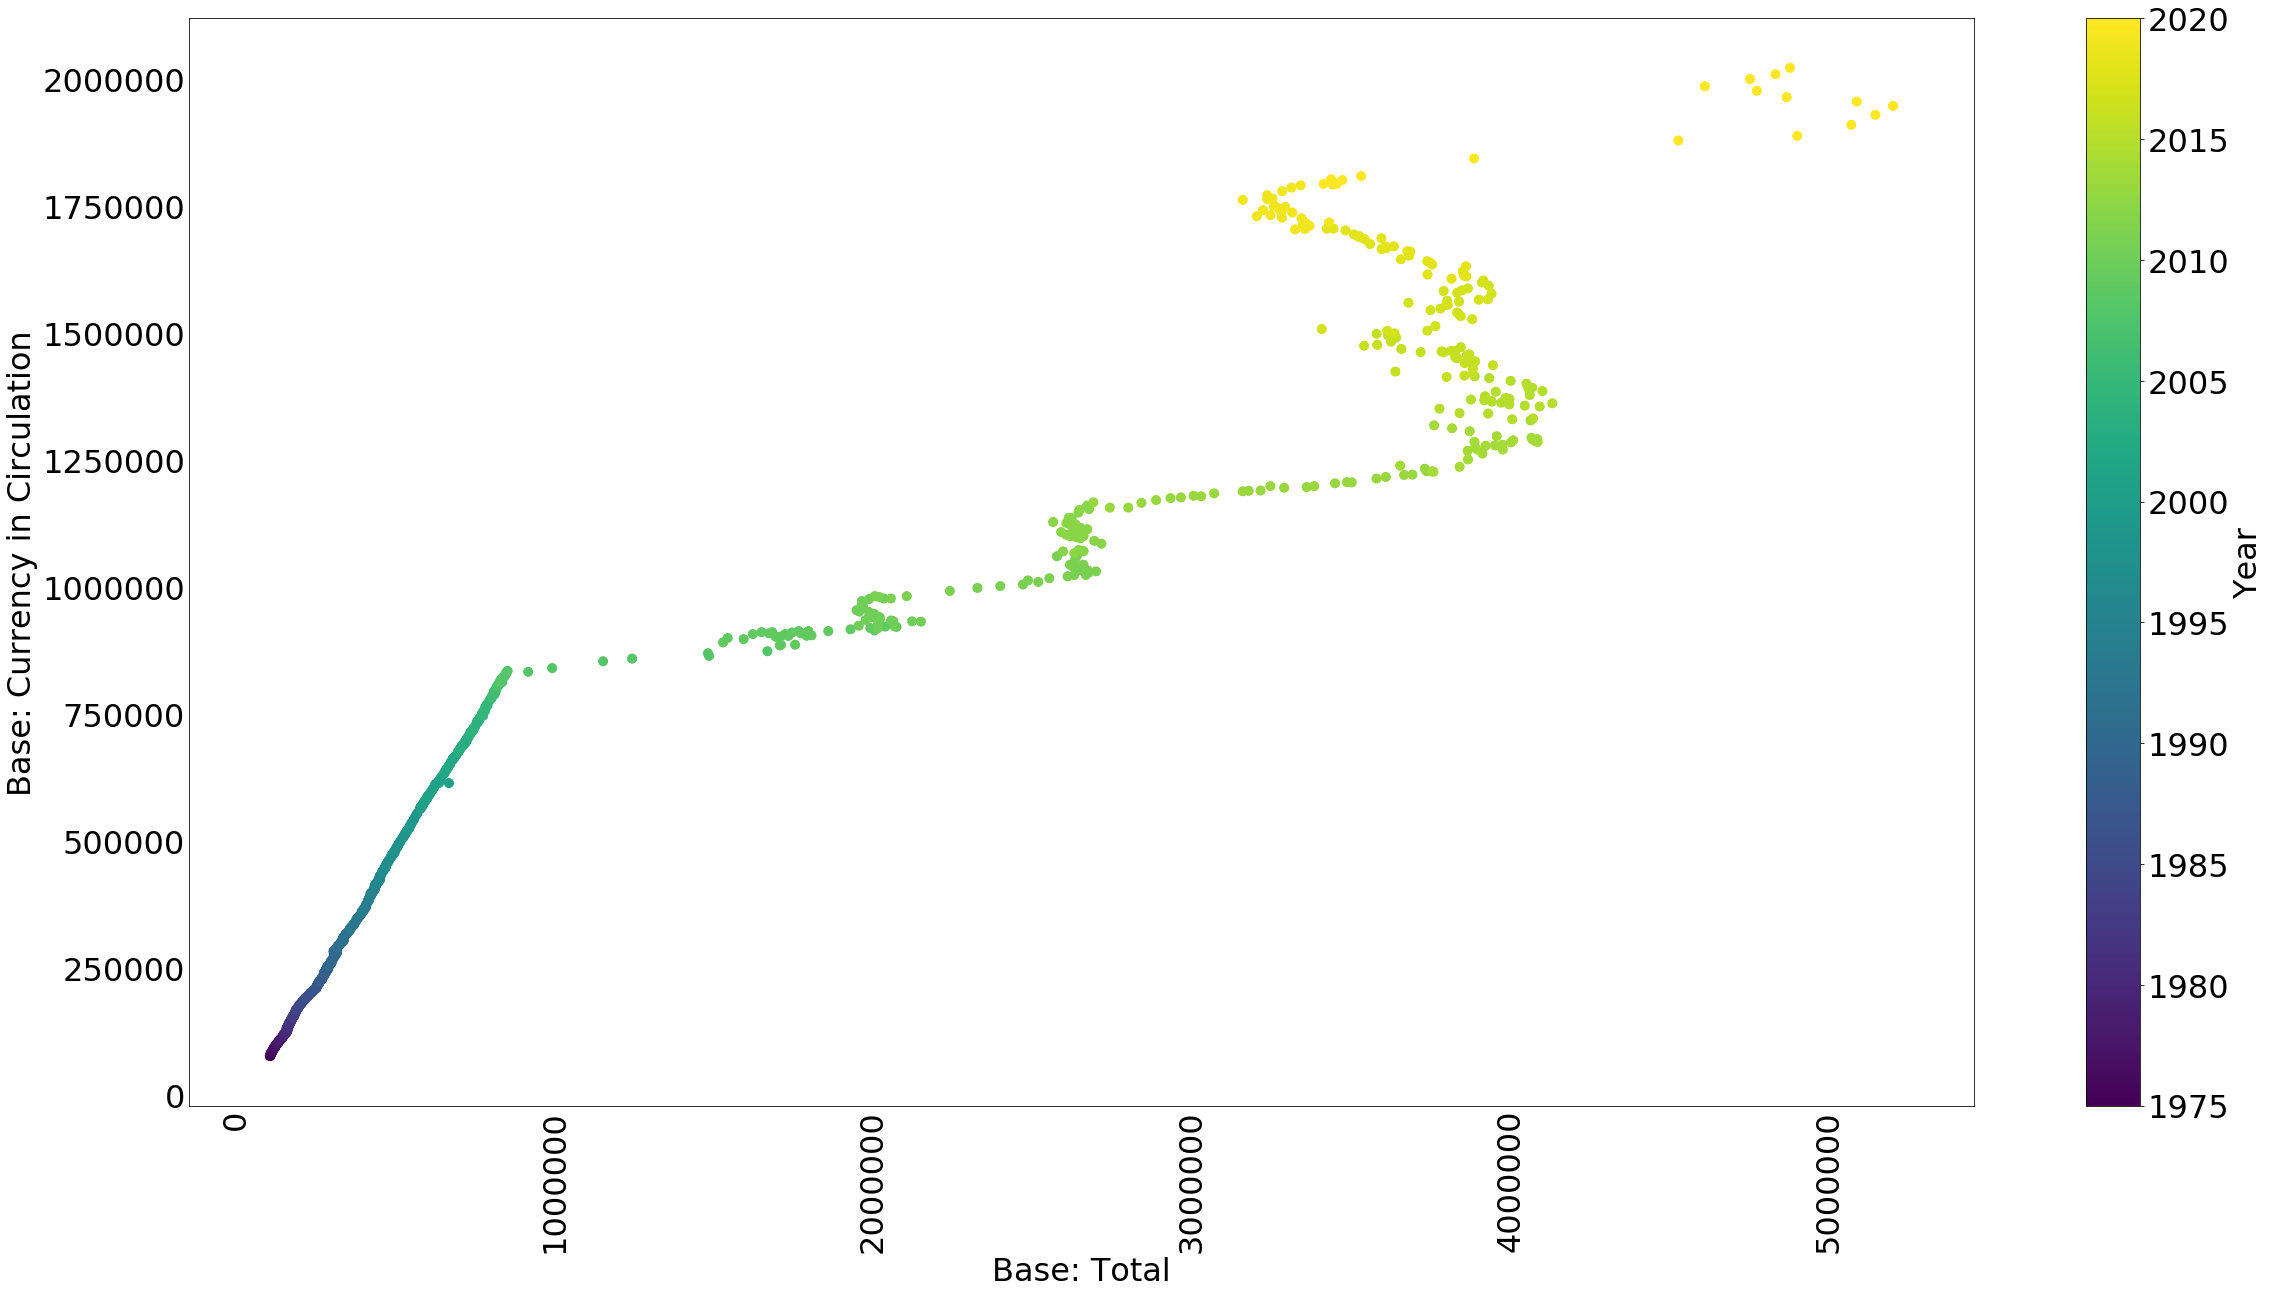

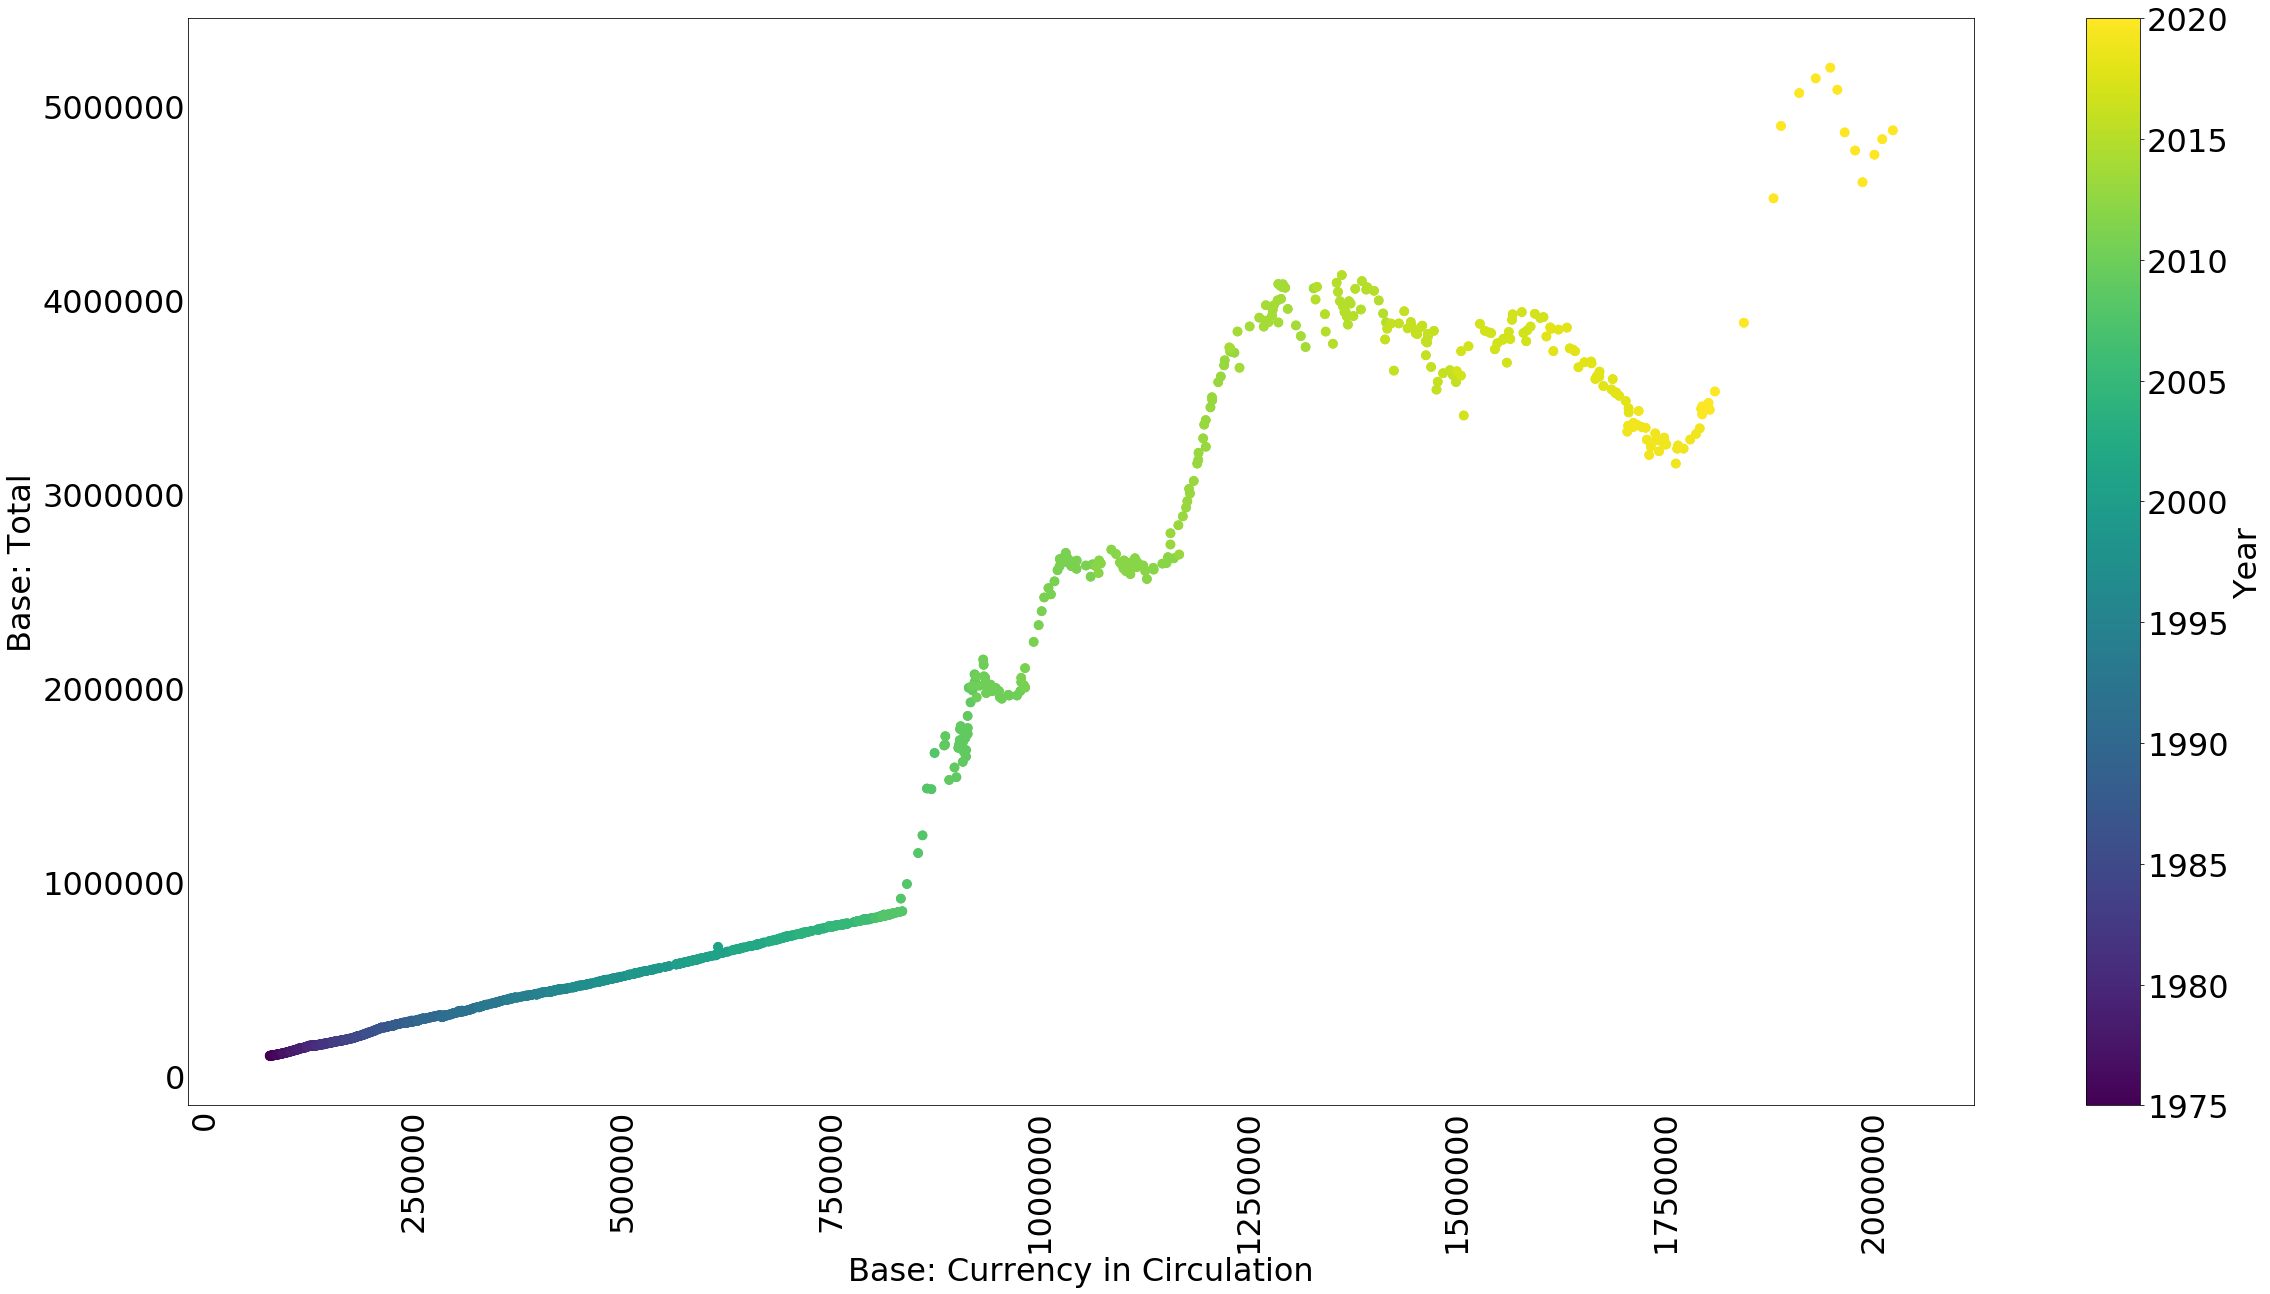

In [5]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

## Breaking down the Federal Reserve's balance sheet

The Federal Reserve is the central bank of the U.S.. Like all banks, the Fed balance sheet. That balance sheet contains assets and liabilities. 

Traditionally, the Federal Reserve has purchased U.S. Treasuries. 

The Fed has also tended to issue Federal Reserve Notes as liabilities. Now the Federal Reserve offers a variety of deposit accounts that holds as liabilities.

In [6]:
def bil_to_mil(series):
    # multiply billions by 1000 to yield millions
    return series * 10 ** 3

We will use bil_to_mil() function to transform data defined in billions to units of millions.

In [7]:
#fedProject.py
# . . . 
data_codes = {"Base: Total ($ Mil)": "BOGMBASEW",
              "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
              
              # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
              
              ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
              
              # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",

              # unamortized value of securities held 
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",

              # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
              # Reserves 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
              ## Major share of depsotis
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
              
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
              
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start,
                  end = end, freq = "M")

In [8]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                  "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [11]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2002-12-31,697517.00,676472.50,725800.50,672844.50,629409.50,629399.50,10.0,0.00,33625.00,0.00,...,21322.00,5628.50,214.50,27313.50,1.250000,NaN,1.238387,NaN,42821.50,30.347
2003-01-31,700446.80,679511.20,724718.40,671196.20,629416.00,629406.00,10.0,0.00,32100.00,0.00,...,26136.80,5650.20,268.60,32360.20,1.250000,NaN,1.235161,NaN,45800.60,32.794
2003-02-28,700362.25,679723.75,721326.00,668666.25,631911.75,631901.75,10.0,0.00,27185.50,0.00,...,23256.25,4637.00,240.75,28276.25,1.250000,NaN,1.262143,NaN,46343.75,32.082
2003-03-31,704898.00,683568.25,723651.25,672446.00,639168.25,639158.25,10.0,0.00,23625.00,0.00,...,22239.00,4952.50,222.75,27551.75,1.250000,NaN,1.252903,NaN,42882.25,30.760
2003-04-30,709173.00,686919.20,736926.40,685518.60,645508.60,645498.60,10.0,0.00,30350.20,0.00,...,25664.80,8352.00,261.00,34412.60,1.250000,NaN,1.258000,NaN,42255.80,30.578
2003-05-31,713596.00,690521.50,738358.00,686681.25,649282.75,649272.75,10.0,0.00,27813.50,0.00,...,24635.50,6420.50,259.00,31440.50,1.250000,NaN,1.259032,NaN,41809.00,30.374
2003-06-30,714323.50,691953.50,738711.75,687867.50,651740.25,651730.25,10.0,0.00,26625.00,0.00,...,23737.75,6387.25,230.50,30520.50,1.200000,NaN,1.222667,NaN,41819.50,30.555
2003-07-31,717764.80,694431.00,741656.20,689564.40,652645.40,652635.40,10.0,0.00,27500.00,0.00,...,25747.00,6003.80,308.20,32420.80,1.000000,NaN,1.011290,NaN,42890.00,31.415
2003-08-31,720466.50,695147.75,740216.50,689164.50,653382.25,653372.25,10.0,0.00,26437.50,0.00,...,25036.25,6023.50,297.75,31559.25,1.000000,NaN,1.029032,NaN,43433.50,31.965


In [15]:
#plots.py

def plot_lines(df, linewidth = 1, figsize = (40,20), 
               legend = True, pp = None):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis="x", rotation=90)
    # get rid of tick lines
    ax.tick_params("both", length=0, which = "both")
    
    vals = ax.get_yticks()
    vals = [int(x) for x in vals]
    ax.set_yticklabels(vals)
    
    # format image filename
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    # avoid cutting off text
    plt.savefig(filename[:50] + "line.png",
               bbox_inches = "tight")
    if pp != None: pp.savefig(fig, box_inches = "tight")

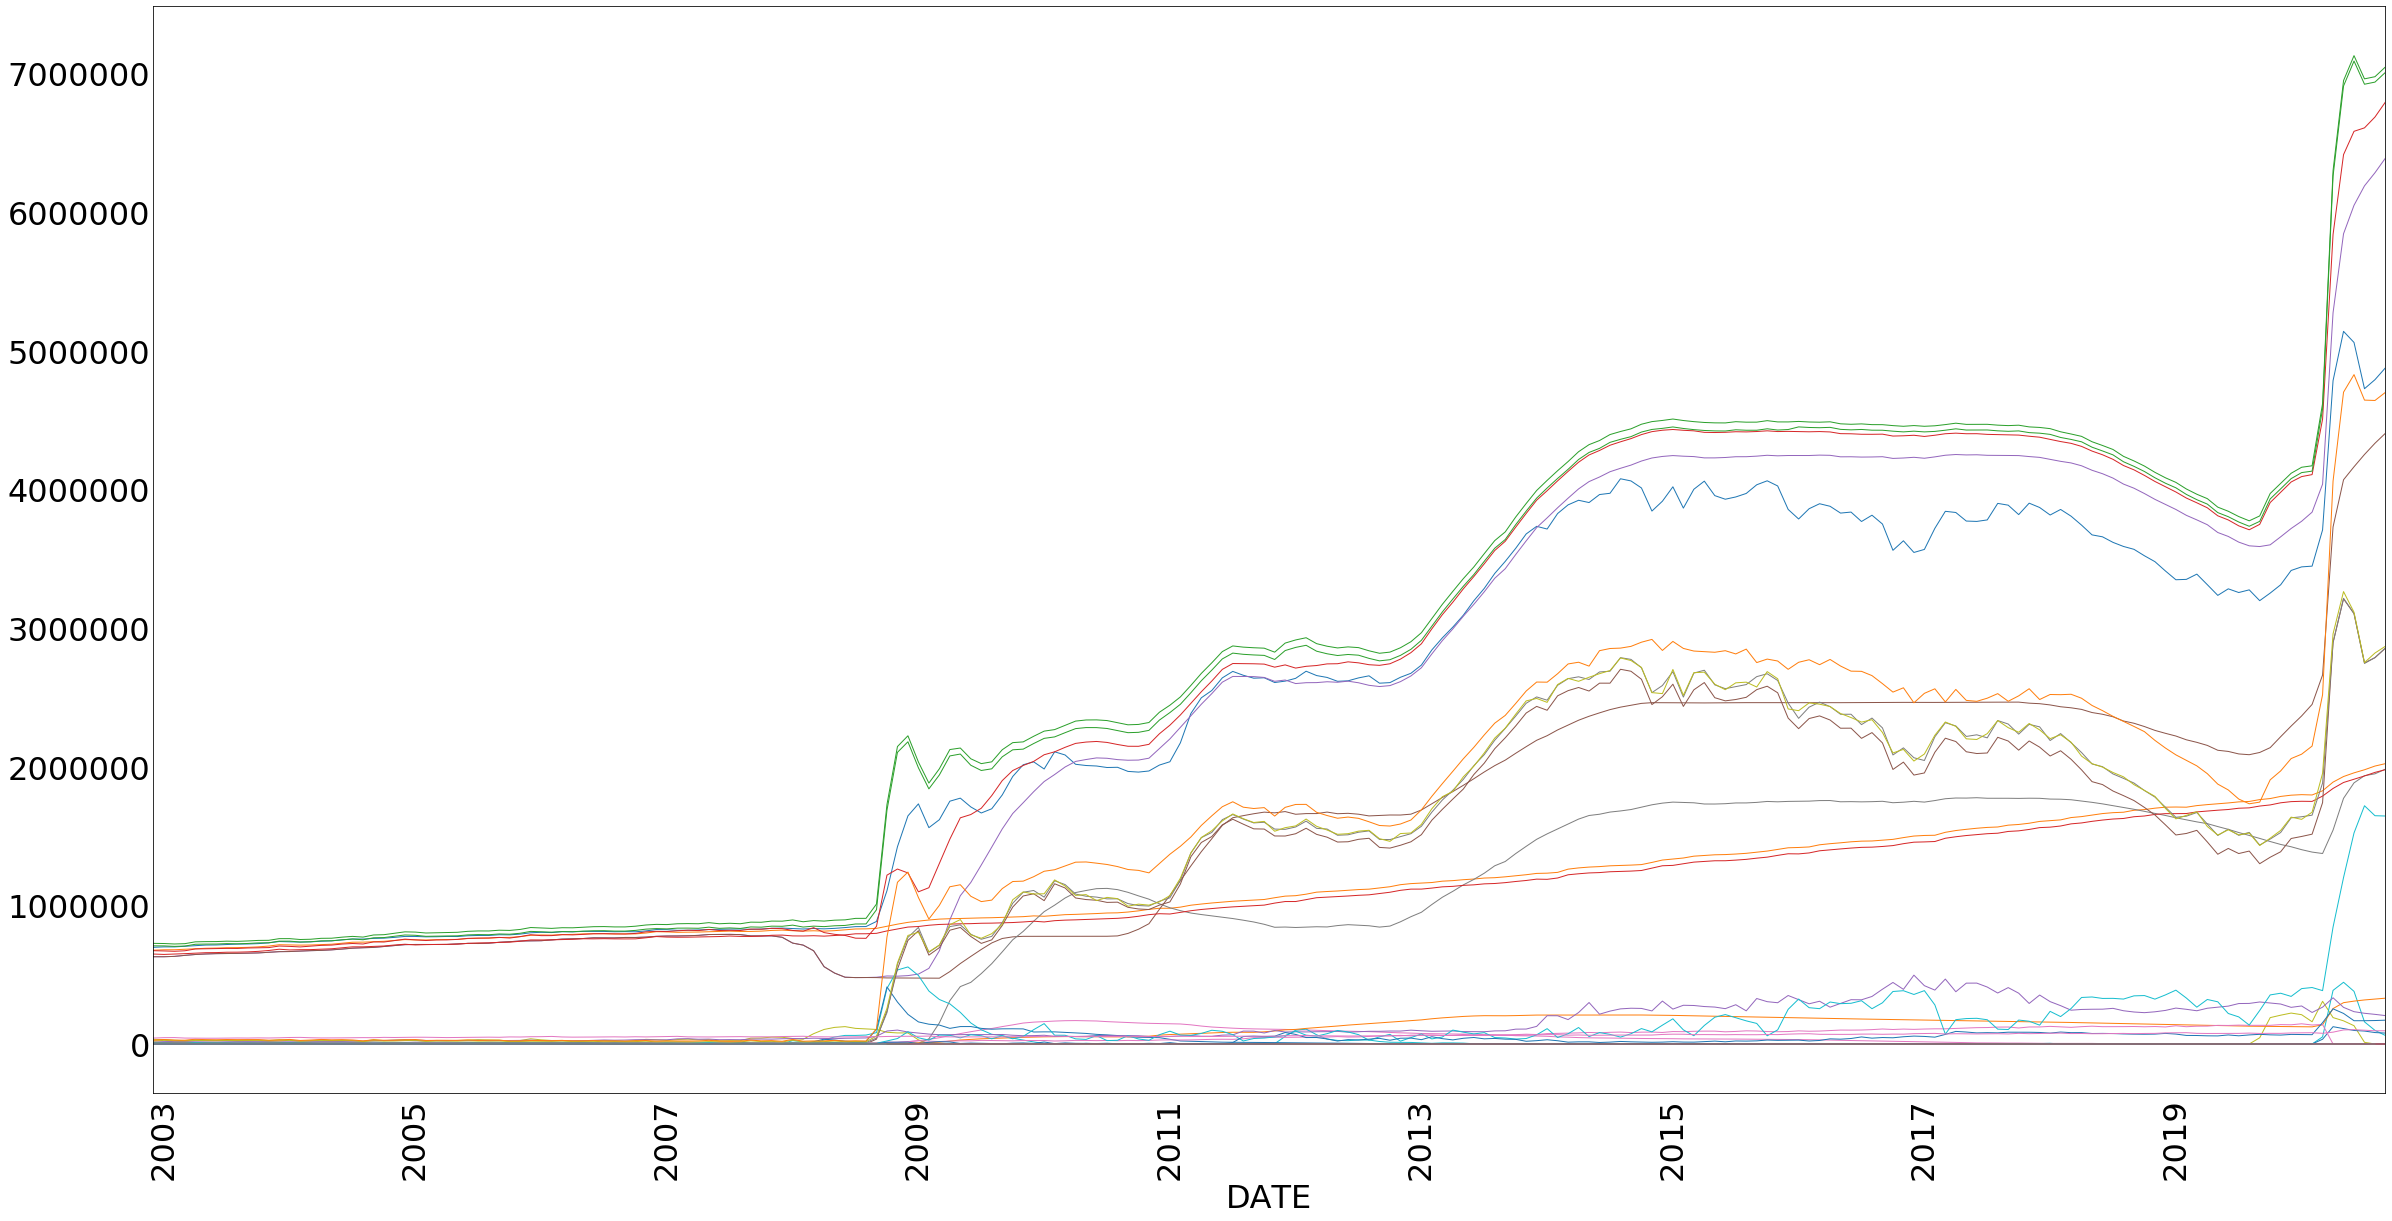

In [17]:
from datlib.plots import *
# fedProject.py
#. . . 
plot_lines(df = data, linewidth = 1, figsize = (40, 20) , pp = None, 
          legend = False)

Next, let's use our plot function to plot them monetary base.

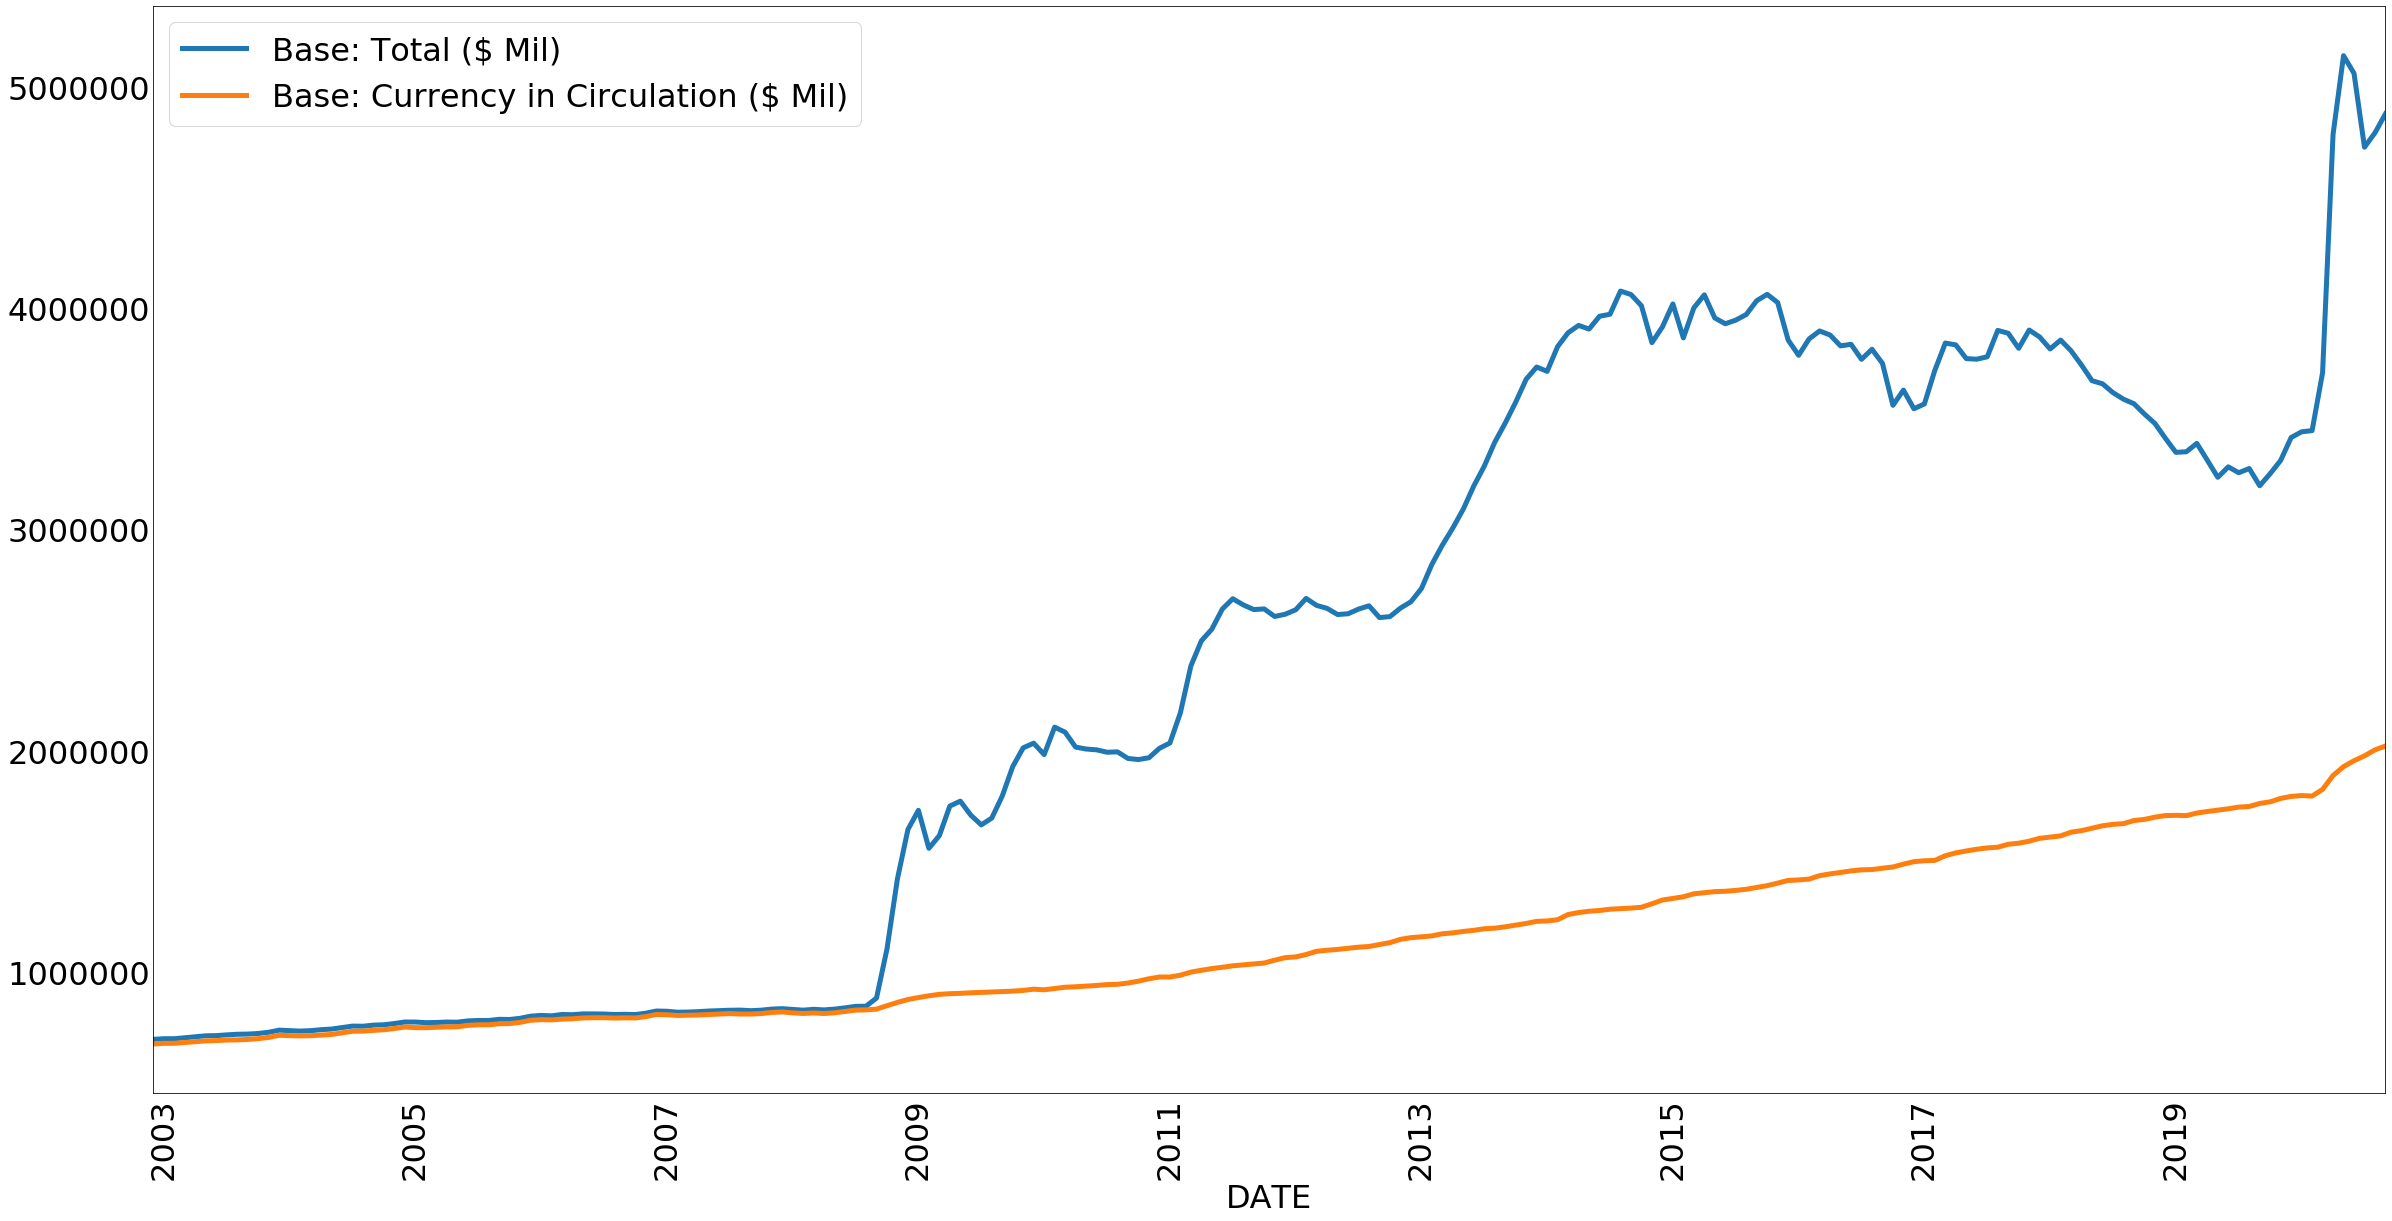

In [20]:
money_vars = ["Base: Total ($ Mil)",
             "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20),
          pp = None)


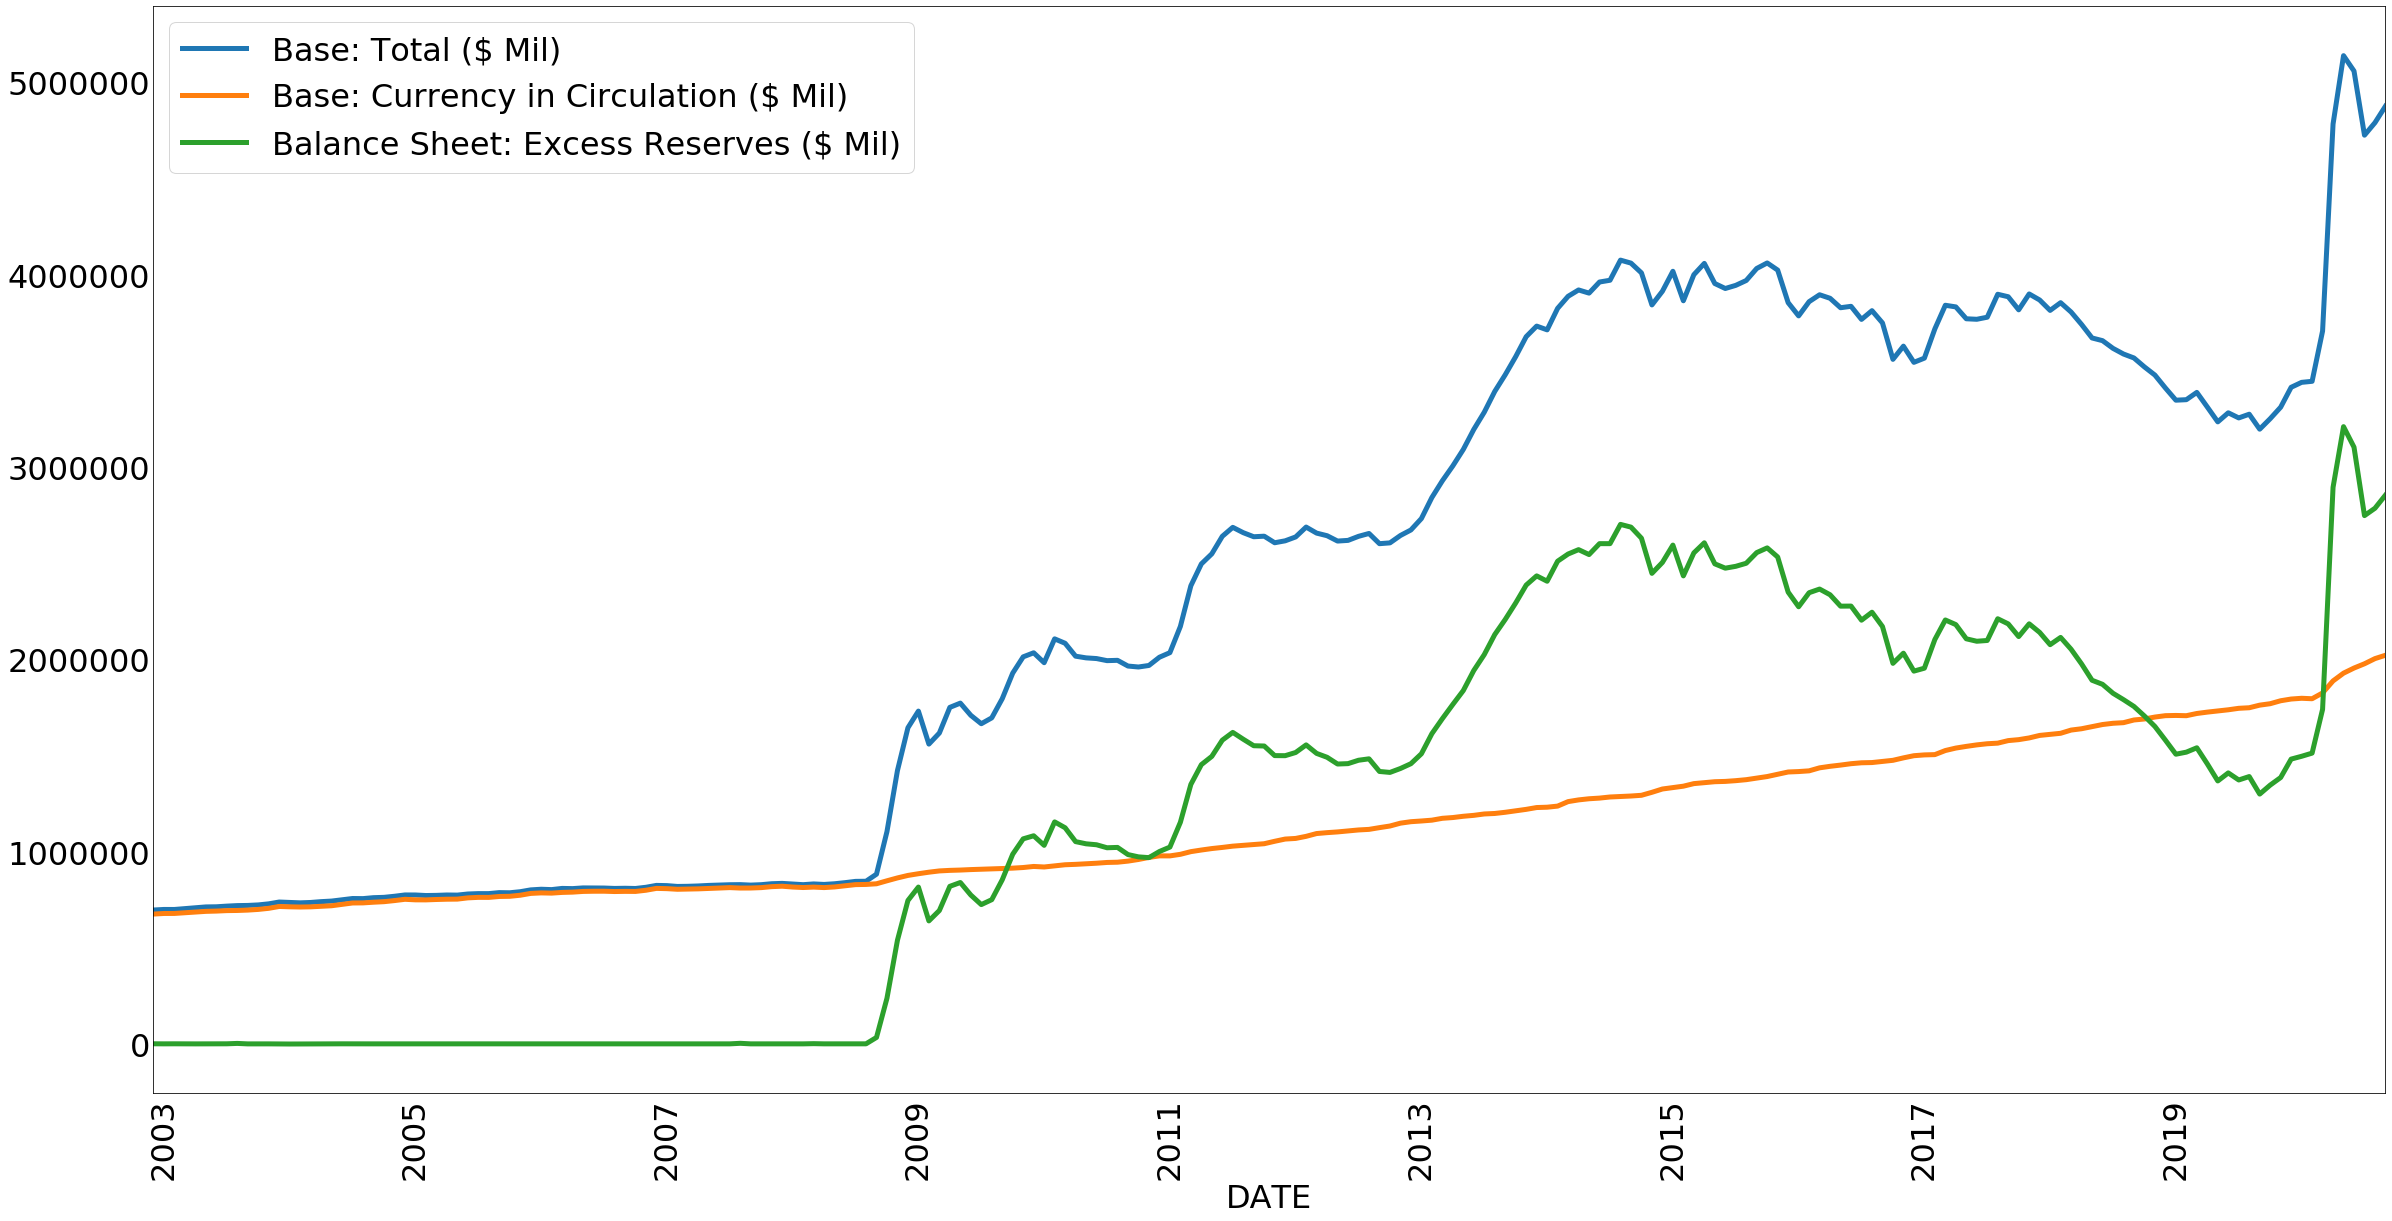

In [21]:
money_vars = ["Base: Total ($ Mil)",
             "Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20),
          pp = None)
